<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 3

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101656 
Name = 'Pantea'
Last_Name = 'Amoie'

# Autoencoders (25 Points)

In this problem, you should implement an autoencoder network, which generates an image presenting the next digit of the input digit. Here are some examples:

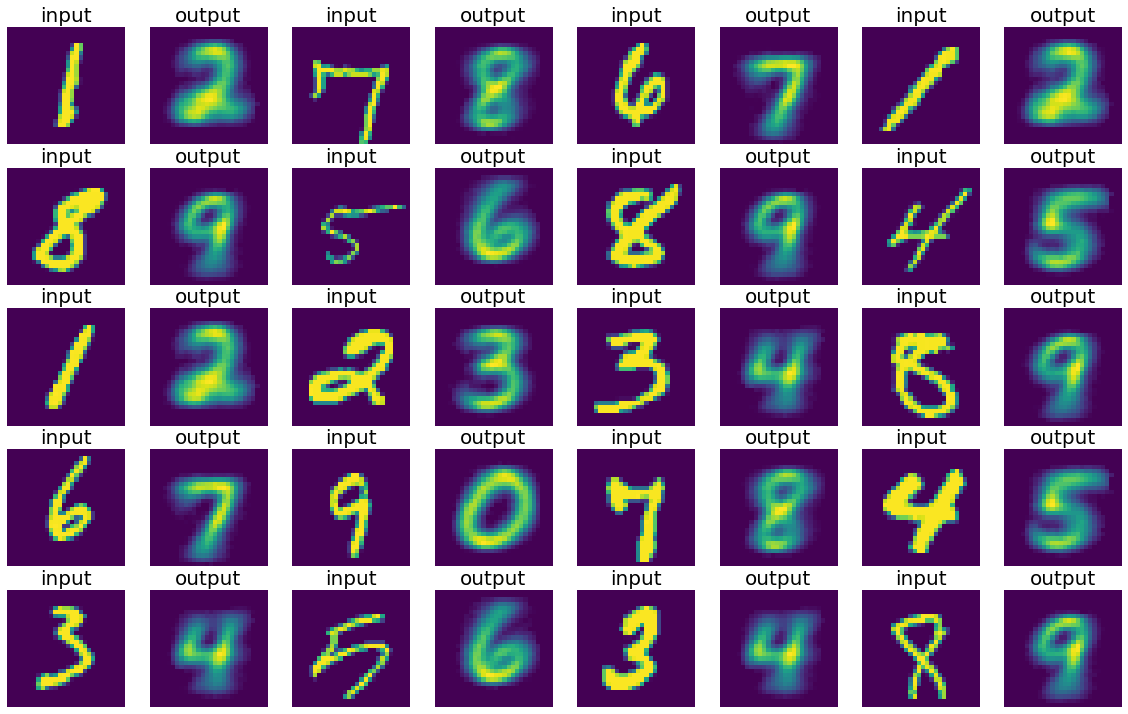

You should use the MNIST dataset, and the ground-truth for each example is provided by a helper function. Make sure to put the `ae_helper.py` file next to this notebook to use the helper function.

## Get the data

Get the data and split them into training, validation, and test sets, by running the following cell. `X` is the input images, `Y` is the ground-truth for each input, and `y` is the input's label.

In [2]:
from ae_helper import get_data
from sklearn.model_selection import train_test_split

X, Y, y = get_data()

X_train, X_test, Y_train, Y_test, y_train, y_test = train_test_split(X, Y, y, test_size=0.2, random_state=17)
X_train, X_val, Y_train, Y_val, y_train, y_val = train_test_split(X_train, Y_train, y_train, test_size=0.1, random_state=17)

## Design your model

Please Implement your autoencoder model below. You MUST implement your model using the `torch` package. The model should input a batch of images and output the generated images for the whole batch. Your model can be consist of fully connected layers (using linear layers), but using fully-convolutional models has extra points.

In [3]:
# ***********************************************
#### This is my Code using linear layers: (I have implemented a better model using CNN in the next block!!)
# ***********************************************
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn import functional as F

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # 3 fully connected layers
        # inputs and outputs are images with 28*28 pixels
        # for the encoder: we should progressively reduce the dimensionality
        # from : 784 -> 128 -> 64 -> 32
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True),
        )
        # for the decoder: we should progressively increase the dimensionality
        # until we again reach 784
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 28*28),
            # we usually use sigmoid at the end of the decoder instead of relu
            # output pixel values between 0(black) and 1(white)
            nn.Sigmoid()  
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # flattening the input image
        x = x.view(-1, 28*28) 
        # applying encoder and decoder
        x = self.encoder(x)
        x = self.decoder(x)
        # reshaping back 
        x = x.view(-1, 28, 28)  
        return x

In [4]:
# class AutoEncoder(nn.Module):
#     def __init__(self):
#         super(AutoEncoder, self).__init__()
#         # Encoder
#         self.encoder = nn.Sequential(
#             # 32 * 14 * 14
#             nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),  
#             nn.ReLU(),
#             # 64 * 7 * 7
#             nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(),
#             # 128 * 4 * 4
#             nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1), 
#             nn.ReLU()
#         )
#         # Decoder
#         self.decoder = nn.Sequential(
#             # 64 * 7 * 7
#             nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  
#             nn.ReLU(),
#             # 32 * 14 * 14
#             nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  
#             nn.ReLU(),
#             # 1 * 28 * 28
#             nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  
#             nn.Sigmoid()  
#         )

#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

## The dataset class, and the dataloaders

The following cells implement the dataset class and create the data loaders for training and validation sets. Feel free to modify the batch size for each data loader.

In [5]:
from typing import Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MnistNextDigitDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.y = torch.from_numpy(y)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int) -> Tuple[torch.Tensor, ...]:
        return self.X[i], self.Y[i], self.y[i]

In [6]:
train_dataloader = DataLoader(
    MnistNextDigitDataset(X_train, Y_train, y_train),
    batch_size=128,
    shuffle=True
)
val_dataloader = DataLoader(
    MnistNextDigitDataset(X_val, Y_val, y_val),
    batch_size=256,
    shuffle=False
)

In [7]:
# place for your custom functions for training and evaluation of the autoencoder

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_autoencoder(model: nn.Module, optimizer: torch.optim.Optimizer, dataloader: DataLoader) -> float:
    # set the model to training mode
    model.train()  
    epoch_loss = 0.0
    
    for batch in dataloader:
        input_images, targets, _ = batch
        # moving the data to the specified device (GPU or CPU) 
        input_images = input_images.to(device)
    
        
        # zeroing the gradients
        optimizer.zero_grad()  
        
        # applying forward pass
        reconstructed_images = model(input_images) 
        
        # computing the reconstruction loss (MSE):
        # we use mse loss for this case because mse is suitable for measuring the avg squared difference between the reconstructed image and the original image
        # Cross-entropy loss is primarily used for classification tasks, not for reconstruction tasks
        loss = F.mse_loss(reconstructed_images, input_images)
        
        # backpropagation
        loss.backward()  
        # updating the weights
        optimizer.step()  
        # add the total loss for the current batch
        epoch_loss += loss.item() * input_images.size(0)
        
    # avg loss per sample
    epoch_loss /= len(dataloader.dataset)  
    
    return epoch_loss


def eval_autoencoder(model: nn.Module, dataloader: DataLoader) -> float:
    # set the model to eval mode
    model.eval() 
    epoch_loss = 0.0
    
    # disable gradient computation
    with torch.no_grad():  
        for batch in dataloader:
            input_images, targets, _ = batch
            # moving the data to the specified device (GPU or CPU) 
            input_images = input_images.to(device)
            targets = targets.to(device)

            # applying forward pass
            reconstructed_images = model(input_images) 

            # computing the reconstruction loss (MSE):
            # we use mse loss for this case because mse is suitable for measuring the avg squared difference between the reconstructed image and the original image
            # Cross-entropy loss is primarily used for classification tasks, not for reconstruction tasks
            loss = F.mse_loss(reconstructed_images, targets) 
            # add the total loss for the current batch
            epoch_loss += loss.item() * input_images.size(0)
    
    epoch_loss /= len(dataloader.dataset)
    
    return epoch_loss



In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_autoencoder(model: nn.Module, optimizer: torch.optim.Optimizer, dataloader: DataLoader) -> float:
    model.train()
    epoch_loss = 0
    for X, Y, _ in dataloader:
        X, Y = X.to(device), Y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = F.mse_loss(outputs, Y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X.size(0)

    epoch_loss /= len(dataloader.dataset)
    return epoch_loss

def eval_autoencoder(model: nn.Module, dataloader: DataLoader) -> float:
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for X, Y, _ in dataloader:
            X, Y = X.to(device), Y.to(device)

            outputs = model(X)
            loss = F.mse_loss(outputs, Y)

            epoch_loss += loss.item() * X.size(0)

    epoch_loss /= len(dataloader.dataset)
    return epoch_loss


## Instantiate the model and optimizer

Instantiate your model and optimizer in the following cell. Feel free to choose the optimizer and its configurations such as learning rate, decay, etc.

In [9]:
#### INSTANTIATE YOUR MODEL AND OPTIMIZER ####
ae = AutoEncoder().to(device=device)
# adam optimizer with learning rate = 0.01
optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)

## Train your autoencoder

Write your training/validation loop in the following cell for an arbitrary number of epochs (until convergence is detected). Make sure to use proper and readable logging containing training and validation metrics for each epoch. Select and store the state dictionary of the best epoch model according to the metrics.

In [10]:
num_epochs = 20
lowest_valid_loss = float('inf')
best_epoch_model_state = None

for epoch in range(num_epochs):
    # training
    train_loss = train_autoencoder(ae, optimizer, train_dataloader)
    
    # validation
    valid_loss = eval_autoencoder(ae, val_dataloader)
    
    # printing the training and validation loss for the each epoch
    print(f"Epoch Number: {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}")
    
    # finding the best model
    if valid_loss < lowest_valid_loss:
        lowest_valid_loss = valid_loss
        # Selecting the state dictionary of the best epoch model 
        best_epoch_model_state = ae.state_dict()


Epoch Number: 1, Train Loss: 0.0697, Validation Loss: 0.0605
Epoch Number: 2, Train Loss: 0.0582, Validation Loss: 0.0562
Epoch Number: 3, Train Loss: 0.0555, Validation Loss: 0.0551
Epoch Number: 4, Train Loss: 0.0550, Validation Loss: 0.0551
Epoch Number: 5, Train Loss: 0.0548, Validation Loss: 0.0548
Epoch Number: 6, Train Loss: 0.0547, Validation Loss: 0.0547
Epoch Number: 7, Train Loss: 0.0545, Validation Loss: 0.0547
Epoch Number: 8, Train Loss: 0.0545, Validation Loss: 0.0546
Epoch Number: 9, Train Loss: 0.0544, Validation Loss: 0.0547
Epoch Number: 10, Train Loss: 0.0543, Validation Loss: 0.0548
Epoch Number: 11, Train Loss: 0.0543, Validation Loss: 0.0548
Epoch Number: 12, Train Loss: 0.0543, Validation Loss: 0.0546
Epoch Number: 13, Train Loss: 0.0542, Validation Loss: 0.0546
Epoch Number: 14, Train Loss: 0.0542, Validation Loss: 0.0546
Epoch Number: 15, Train Loss: 0.0542, Validation Loss: 0.0547
Epoch Number: 16, Train Loss: 0.0542, Validation Loss: 0.0547
Epoch Number: 17,

## Load the state dictionary of the best epoch

Load the state dictionary of the best epoch model into the model object.

In [11]:
#### LOAD THE BEST EPOCH STATE DICTIONARY ####
# load the state dictionary of the best model
ae.load_state_dict(best_epoch_model_state)


<All keys matched successfully>

## Visualize your model

Select 40 examples from the test set and visualize the input and output of the model for them (See the examples at the beginning of the notebook).

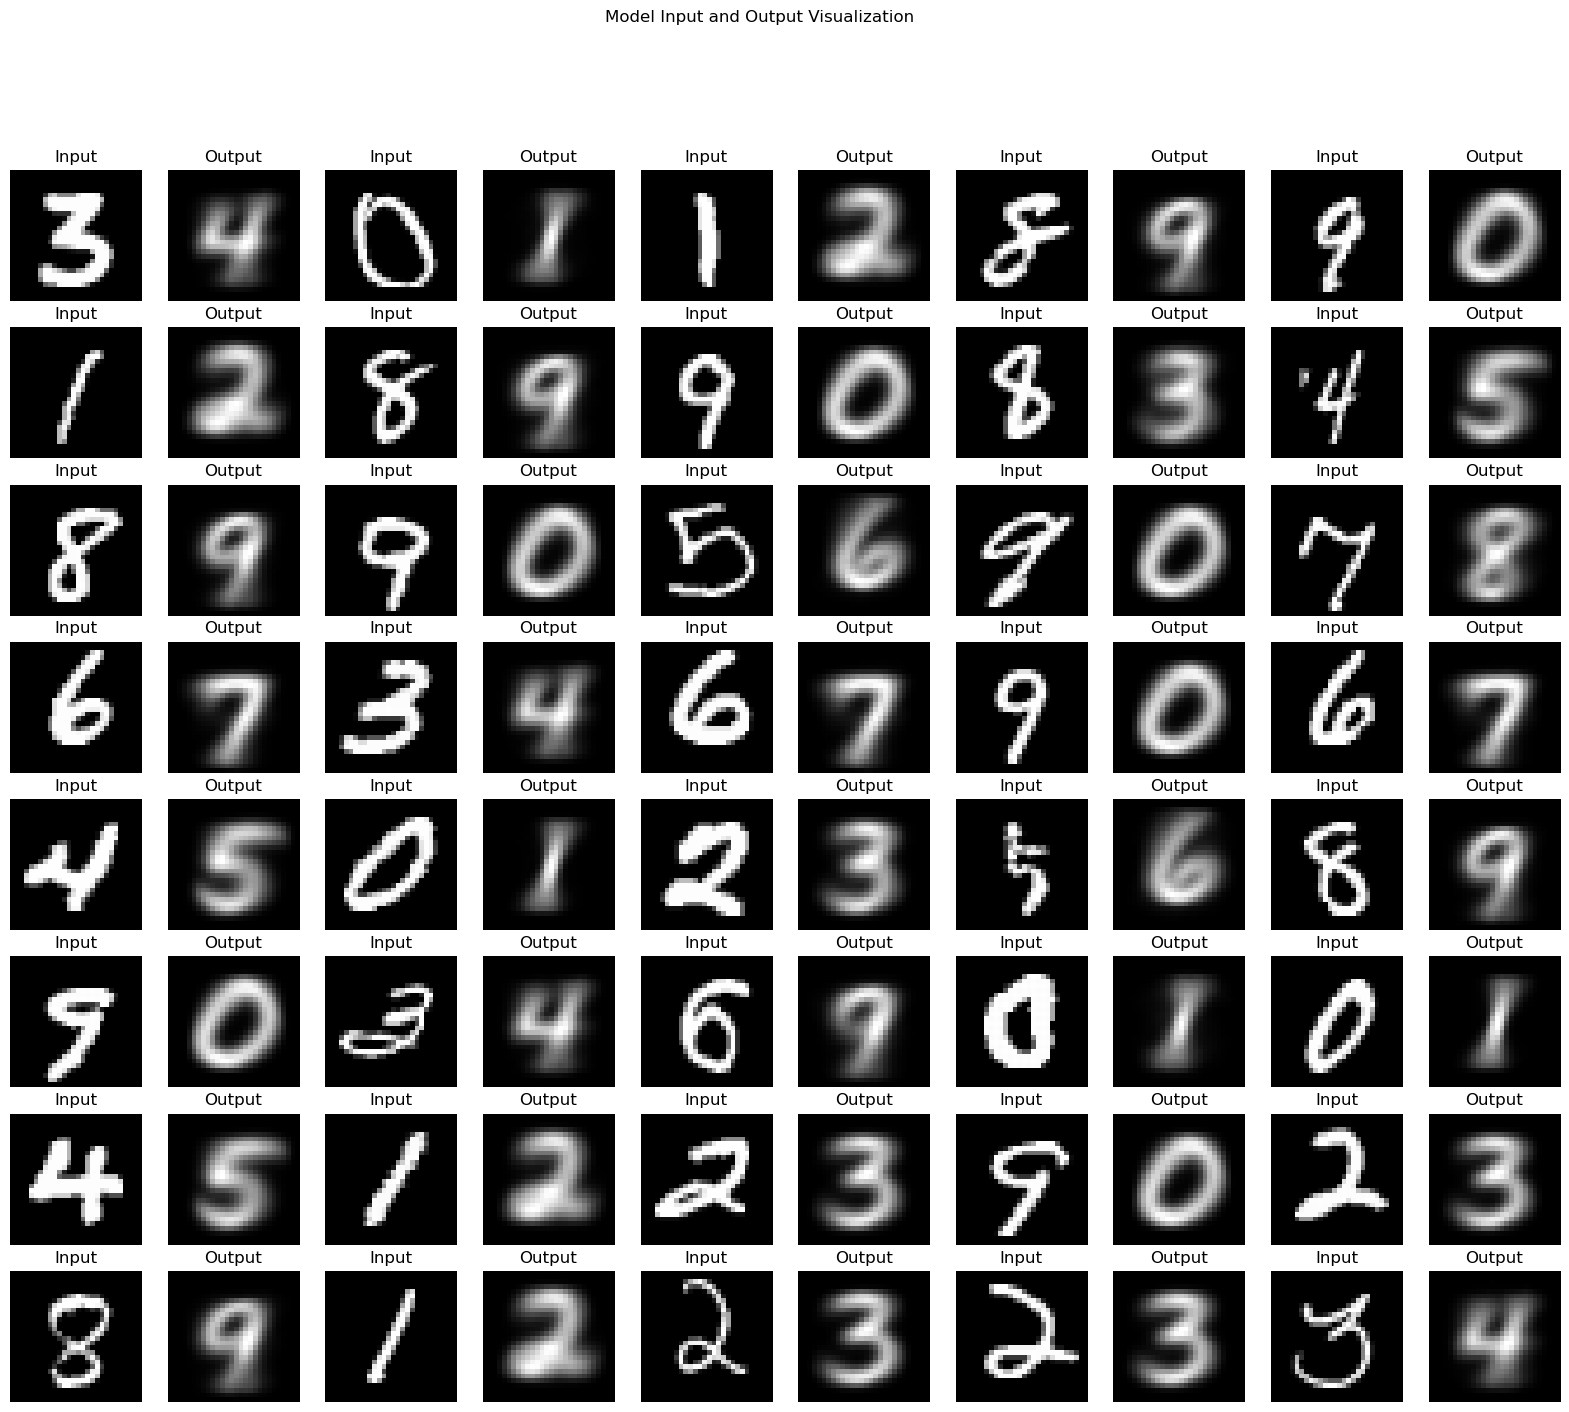

In [12]:
#### VISUALIZE YOUR MODEL ####
import matplotlib.pyplot as plt
# 40 examples from the test set
num_examples = 40
examples_indices = np.random.choice(len(X_test), num_examples, replace=False)
X_test_selected = torch.from_numpy(X_test[examples_indices]).unsqueeze(1).to(device)  # Adding channel dimension

with torch.no_grad():
    outputs = ae(X_test_selected) 

# Plot the input and output images
fig, axes = plt.subplots(nrows=8, ncols=10, figsize=(20, 16))

for i in range(num_examples):
    # Plot the input images
    ax = axes[i // 5, (i % 5) * 2]
    ax.imshow(X_test_selected[i].cpu().squeeze(), cmap='gray')  # assuming input is grayscale
    ax.set_title("Input")
    ax.axis('off')

    # Plot the output images
    ax = axes[i // 5, (i % 5) * 2 + 1]
    ax.imshow(outputs[i].cpu().squeeze(), cmap='gray')  # assuming output is grayscale
    ax.set_title("Output")
    ax.axis('off')

plt.suptitle('Model Input and Output Visualization')
plt.show()

